<a href="https://colab.research.google.com/github/cRED-f/deep-learning/blob/main/SelfOrganizingMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self Organizing Map

"""
Fraud Detection:

Imagine we are deep learning scientist working for bank and we are given a data set
that contains information of customers from this bank applying for advanced
credit card.

So basically, these informations are the data that customers had to provide
when filling the application form.

Our mission is to detect potential fraud within these applications.

We have to give explicit list, of the customers who potentially cheated.

we will not make a supervised deep learning model and try to predict if each
customer potentially cheated; yes or no with a dependent variable that has binary
values.

we need to identify some patterns in a high dimensional data sets that have
non-linear relationships. And one of these patterns(customers) will be
the potential fraud. That is the customers who potentially cheated.

We have to return the potential fraudulent customers. <-- unsupervised learning.
"""

# importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import the dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [ ]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
"""
This file concerns credit card applications. All attribute names and values have
been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous,
nominal with small numbers of values, and nominal with larger numbers of values.
There are also a few missing values.
"""

'\nThis file concerns credit card applications. All attribute names and values have \nbeen changed to meaningless symbols to protect confidentiality of the data.\n\nThis dataset is interesting because there is a good mix of attributes -- continuous, \nnominal with small numbers of values, and nominal with larger numbers of values. \nThere are also a few missing values.\n'

## create two subsets

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [ ]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [ ]:
"""
for each customer, the winning node is the most similar neuron to the customer, then,
we use a neighborhood function like the galch neighborhood function,
to update the weight of the neighbors of the winning node to move them closer to
the point. We do this for all the customers in the input space.

So we'll repeat that again. We'll repeat all this many times.
And each time we'll repeat it, the output space decreases and loses dimensions.

It reduces its dimension little by little. And then it reaches a point where
the neighborhood stops decreasing, where the output space stops decreasing.

And that's the moment where we obtained our self organizing map in two dimensions
with all the winning nodes that were eventually identified.

when we think about frauds, we think about outliers because the fraud basically is
defined by something that is far from the general rules. So the frauds are actually
the outlying neurons for self-organizing map.

To detect the outline neurons, we need MID(Mean Interneuron Distance).

we're going to compute the mean of the Euclidean distance between this neuron
and the neurons in its neighborhood.
"""

"\nfor each customer, the winning node is the most similar neuron to the customer, then, \nwe use a neighborhood function like the galch neighborhood function,\nto update the weight of the neighbors of the winning node to move them closer to \nthe point. We do this for all the customers in the input space.\n\nSo we'll repeat that again. We'll repeat all this many times.\nAnd each time we'll repeat it, the output space decreases and loses dimensions.\n\nIt reduces its dimension little by little. And then it reaches a point where \nthe neighborhood stops decreasing, where the output space stops decreasing.\n\nAnd that's the moment where we obtained our self organizing map in two dimensions\nwith all the winning nodes that were eventually identified.\n\nwhen we think about frauds, we think about outliers because the fraud basically is\ndefined by something that is far from the general rules. So the frauds are actually\nthe outlying neurons for self-organizing map.\n\nTo detect the outline

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [ ]:
X = sc.fit_transform(X)

In [ ]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [ ]:
"""
x and y are the dimensions of the grid to self-organizing map.
dimensions must not be too small because we want to get the outliers
in evidence. Therefore we need a bigger map to detect outliers easily.

input_len : len(columns of the X)

sigma is the radius of the different neighborhoods in the grid.
"""

'\nx and y are the dimensions of the grid to self-organizing map.\ndimensions must not be too small because we want to get the outliers\nin evidence. Therefore we need a bigger map to detect outliers easily.\n\ninput_len : len(columns of the X)\n\nsigma is the radius of the different neighborhoods in the grid.\n'

# Train the SOM

In [ ]:
from minisom import MiniSom

In [ ]:
som = MiniSom(x = 10, y=10, input_len = 15, sigma = 1.0,learning_rate = 0.5)

In [ ]:
som.random_weights_init(X)# to initialize the weights randomly.
som.train_random(data = X , num_iteration = 100) # to train SOM.

In [ ]:
"""
basically, if MID is higher, then the winning node will be far away from it's
neighbors. (Inside a neighborhood.) Therefore; higher the MID, the more the winning
node is an outlier.

winning notes will be colored by different colors in such a way that the larger is
the MID, the closer to white the color will be.
"""

"\nbasically, if MID is higher, then the winning node will be far away from it's \nneighbors. (Inside a neighborhood.) Therefore; higher the MID, the more the winning \nnode is an outlier.\n\nwinning notes will be colored by different colors in such a way that the larger is \nthe MID, the closer to white the color will be.\n"

In [ ]:
"""
we actually identified the outlier(fraud) in below.

to get the explicit list of the customers, we just need to the inverse mapping
of these winning nodes to see which customers are associated to this winning node.

also, we can add some markers to detect them in the map easily!
"""

'\nwe actually identified the outlier(fraud) in below.\n\nto get the explicit list of the customers, we just need to the inverse mapping\nof these winning nodes to see which customers are associated to this winning node.\n\nalso, we can add some markers to detect them in the map easily!\n'

# Visualizing the results

In [ ]:
from pylab import  pcolor, colorbar, plot, show

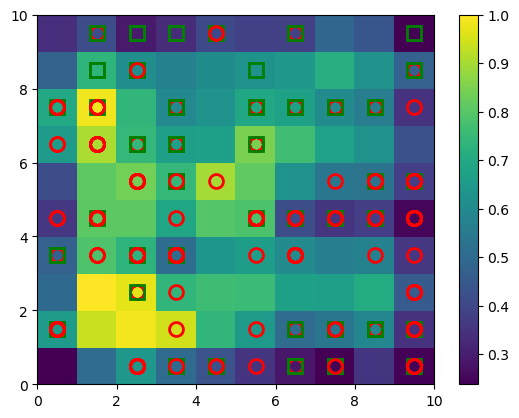

In [ ]:
pcolor(som.distance_map().T)  # all the different colors corresponding to the MID's.
colorbar()                    # white colors are the outliers (frauds).
markers = ['o', 's']          # red circles(r, o) : the customers who didn't get approval.
colors  = ['r', 'g']          # green squares(g, s) : the customers who got approval.
for i, j in enumerate(X):     # i : indexes, j : all the vectors of customers at i.
    w = som.winner(j)         # winning node.
    plot(w[0] + 0.5,          # we want to put the marker at the center of the square.
         w[1] + 0.5,          # we want to put the marker at the center of the square.
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the frauds

In [ ]:
mappings = som.win_map(X)

In [ ]:
frauds = np.array(mappings[(1,7)])

In [ ]:
frauds = sc.inverse_transform(frauds)

In [ ]:
frauds[:,0:1] # frauds id's

array([[15608595.],
       [15761158.],
       [15711742.],
       [15666166.],
       [15605872.],
       [15665087.]])